#### Bhagyashree Deshpande
# 1. Delivery_time -> Predict delivery time using sorting time

## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
data = pd.read_csv('delivery_time.csv')

In [5]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Understanding

### Initial Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.shape

(21, 2)

In [8]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Assumptions Check

#### 1. Normality Check

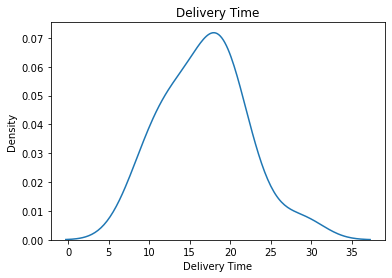

In [11]:
sns.distplot(a = data['Delivery Time'], hist = False)
plt.title('Delivery Time')
plt.show()

In [12]:
data['Delivery Time'].skew()

0.3523900822831107

In [13]:
data['Delivery Time'].kurtosis()

0.31795982942685397

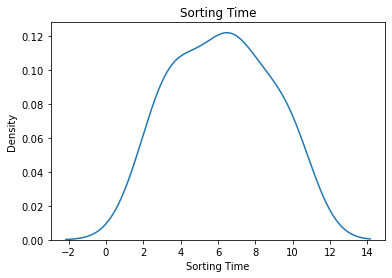

In [14]:
sns.distplot(a = data['Sorting Time'], hist = False)
plt.title('Sorting Time')
plt.show()

In [15]:
data['Sorting Time'].skew()

0.047115474210530174

In [16]:
data['Sorting Time'].kurtosis()

-1.14845514534878

#### Normality test using Probplot

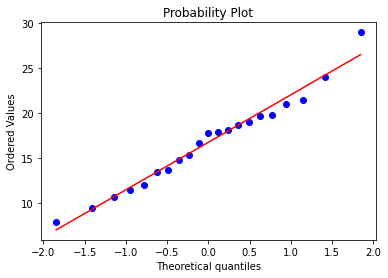

In [17]:
stats.probplot(x = data['Delivery Time'], dist = 'norm', plot = plt)
plt.show()

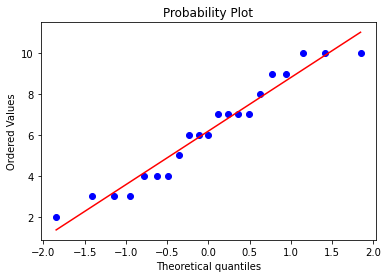

In [18]:
stats.probplot(x = data['Sorting Time'], dist = 'norm', plot = plt)
plt.show()

#### Normality Test is passed for both Delivery Time and Sorting Time

#### 2. Linearity Test

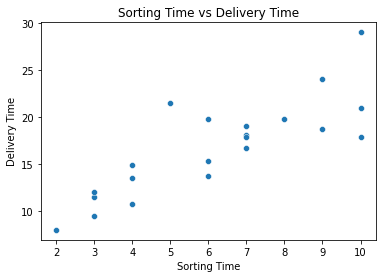

In [19]:
sns.scatterplot(x = 'Sorting Time', y = 'Delivery Time', data = data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

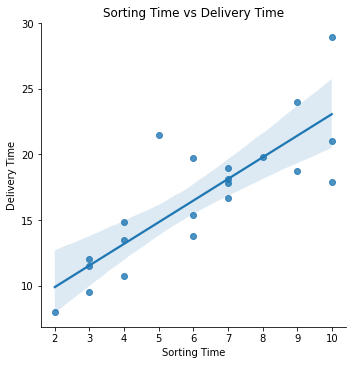

In [20]:
sns.lmplot(x = 'Sorting Time', y = 'Delivery Time', data = data)
plt.title('Sorting Time vs Delivery Time')
plt.show()

#### Linearity Test is failed.

#### 3. Correlation Test

In [21]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

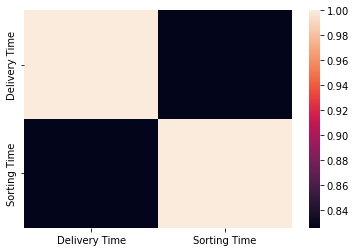

In [22]:
sns.heatmap(data.corr())

#### There is a positive correlation between Delivery Time and Sorting Time

## Model Building

In [23]:
data = data.rename({'Delivery Time': 'd', 'Sorting Time': 's'}, axis = 1)
data.head()

,d,s
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Model 1 - Without applying any transformations

In [24]:
model_1 = smf.ols('d~s', data = data).fit()

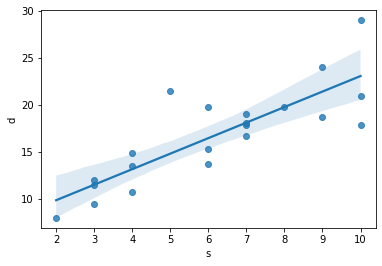

In [25]:
sns.regplot(x = 's', y = 'd', data = data)
plt.show()

In [26]:
model_1.params

Intercept    6.582734
s            1.649020
dtype: float64

In [27]:
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept    3.823349
s            6.387447
dtype: float64 
 Intercept    0.001147
s            0.000004
dtype: float64


In [28]:
(model_1.rsquared, model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [29]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        21:03:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [30]:
pred_1 = model_1.predict(data.s)
pred_1.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [31]:
actual_data = data.d

In [51]:
from math import sqrt

In [52]:
root_1 = sqrt(mean_squared_error(pred_1, actual_data))
root_1

2.7916503270617654

### Model 2 - Applying log transformation on the independent data

In [36]:
model_2 = smf.ols('d~np.log(s)', data = data).fit()

In [37]:
model_2.params

Intercept    1.159684
np.log(s)    9.043413
dtype: float64

In [38]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        21:12:57   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(s)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [40]:
pred_2 = model_2.predict(data.s)
pred_2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [53]:
root_2 = sqrt(mean_squared_error(pred_2, actual_data))
root_2

2.7331714766820663

### Model 3 - Applying Exponential transformation on the independent data

In [42]:
model_3 = smf.ols('d~np.exp(s)', data = data).fit()

In [43]:
model_3.params

Intercept    15.083578
np.exp(s)     0.000393
dtype: float64

In [44]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 15 Jan 2022   Prob (F-statistic):            0.00396
Time:                        21:17:45   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(s)      0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [45]:
pred_3 = model_3.predict(data.s)
pred_3.head()

0    23.739082
1    15.105033
2    15.242109
3    18.267760
4    23.739082
dtype: float64

In [54]:
root_3 = sqrt(mean_squared_error(pred_3, actual_data))
root_3

3.958615702523664

### Model 4 - Applying Reciprocal transformation on the independent data

In [47]:
model_4 = smf.ols('d~np.reciprocal(s)', data = data).fit()

In [48]:
model_4.params

Intercept           16.790952
np.reciprocal(s)     0.000000
dtype: float64

In [49]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                nan
Time:                        21:22:20   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(s)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model Testing

In [50]:
pred_4 = model_4.predict(data.s)
pred_4.head()

0    16.790952
1    16.790952
2    16.790952
3    16.790952
4    16.790952
dtype: float64

In [55]:
root_4 = sqrt(mean_squared_error(pred_4, actual_data))
root_4

4.95259614917066

### Mdel 5 - Applying square root transformation on the independent data

In [56]:
model_5 = smf.ols('d~np.sqrt(s)', data = data).fit()

In [57]:
model_5.params

Intercept    -2.518837
np.sqrt(s)    7.936591
dtype: float64

In [58]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.61e-06
Time:                        21:32:07   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(s)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [59]:
pred_5 = model_5.predict(data.s)
pred_5.head()

0    22.578867
1    13.354345
2    16.921761
3    21.290936
4    22.578867
dtype: float64

In [60]:
root_5 = sqrt(mean_squared_error(pred_5, actual_data))
root_5

2.7315432100912105

## Conclusion

In [62]:
Conclusion = {'Model': pd.Series(['model_1','model_2','model_3','model_4','model_5']), 'Rsquared':(model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared), 'Adj Rsquared':(model_1.rsquared_adj, model_2.rsquared_adj, model_3.rsquared_adj, model_4.rsquared_adj, model_5.rsquared_adj), 'RMSE':(root_1, root_2, root_3, root_4, root_5)}
Conclusion = pd.DataFrame(Conclusion)
Conclusion

,Model,Rsquared,Adj Rsquared,RMSE
0,model_1,0.682271,0.665549,2.791650
1,model_2,0.695443,0.679414,2.733171
2,model_3,0.361118,0.327492,3.958616
3,model_4,0.000000,0.000000,4.952596
4,model_5,0.695806,0.679796,2.731543


### Conclusion

By comparing all the 5 models, we observe that the model 5 is better to predict the delivery time as it has better R-squared and Adjusted R-squared value compared to other models and also the RMSE value is less.

## =======================================================================

### 2. Salary_hike -> Build a prediction model for Salary_hike

## Import Necessary Libraries

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [4]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Understanding

### Initial Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.shape

(30, 2)

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Assumptions Check

In [12]:
data = data.rename({'YearsExperience': 'exp', 'Salary': 'sal'}, axis =1)
data.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### 1. Normality Check

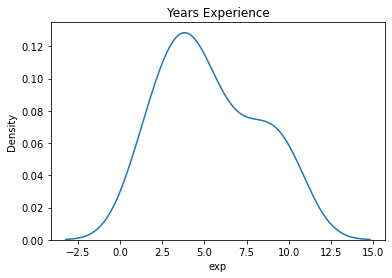

In [13]:
sns.distplot(a = data['exp'], hist = False)
plt.title('Years Experience')
plt.show()

In [15]:
data['exp'].skew()

0.37956024064804106

In [16]:
data['exp'].kurtosis()

-1.0122119403325072

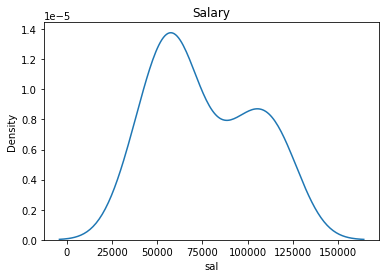

In [14]:
sns.distplot(a = data['sal'], hist = False)
plt.title('Salary')
plt.show()

In [17]:
data['sal'].skew()

0.35411967922959153

In [18]:
data['sal'].kurtosis()

-1.295421086394517

#### Normality test using probplot

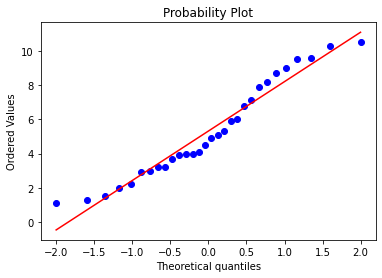

In [21]:
stats.probplot(x = data['exp'], dist = 'norm', plot = plt)
plt.show()

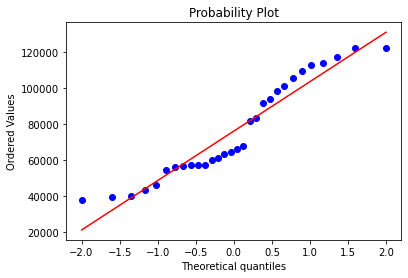

In [22]:
stats.probplot(x = data['sal'], dist = 'norm', plot = plt)
plt.show()

#### Normality Test is passed for both Years Experience and Salary

#### 2. Linearity Test

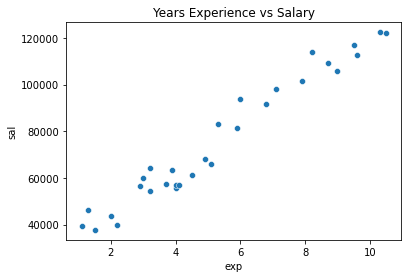

In [23]:
sns.scatterplot(x = 'exp', y = 'sal', data = data)
plt.title('Years Experience vs Salary')
plt.show()

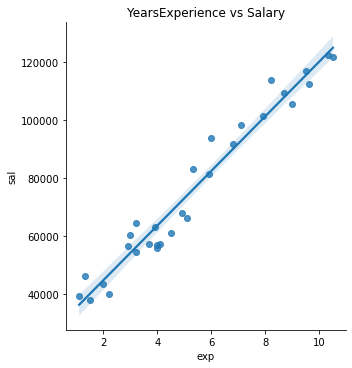

In [24]:
sns.lmplot(x = 'exp', y = 'sal', data = data)
plt.title('YearsExperience vs Salary')
plt.show()

#### Linearity Test is passed

#### 3. Correlation Test

In [25]:
data.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


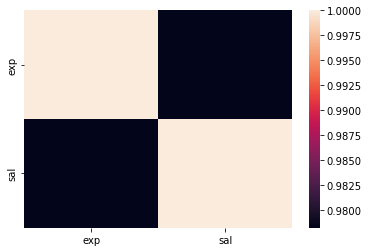

In [27]:
sns.heatmap(data.corr())
plt.show()

#### There is a positive correlation between Years Experience and Salary

## Model Building

### Model 1 - Without applying any transformation

In [28]:
model_1 = smf.ols('sal~exp', data = data).fit()

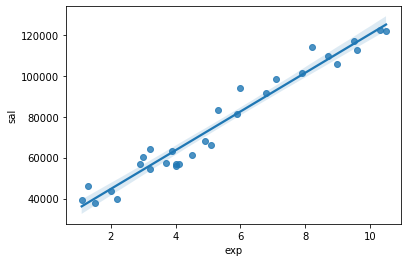

In [30]:
sns.regplot(x = 'exp', y = 'sal', data = data)
plt.show()

In [31]:
model_1.params

Intercept    25792.200199
exp           9449.962321
dtype: float64

In [32]:
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept    11.346940
exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
exp          1.143068e-20
dtype: float64


In [33]:
(model_1.rsquared, model_1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [34]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        22:22:55   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [35]:
pred_1 = model_1.predict(data.exp)
pred_1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

In [37]:
actual_data = data.sal

In [38]:
root_1 = sqrt(mean_squared_error(pred_1, actual_data))
root_1

5592.043608760662

### Model 2 - Applying log transformation on the independent data

In [39]:
model_2 = smf.ols('sal~np.log(exp)', data = data).fit()

In [40]:
model_2.params

Intercept      14927.97177
np.log(exp)    40581.98796
dtype: float64

In [41]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        22:27:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [43]:
pred_2 = model_2.predict(data.exp)
pred_2.head()

0    18795.848339
1    25575.235192
2    31382.551905
3    43057.262306
4    46925.138875
dtype: float64

In [45]:
root_2 = sqrt(mean_squared_error(pred_2, actual_data))
root_2

10302.893706228302

### Model 3 - Applying Exponential transformation on the independent data

In [46]:
model_3 = smf.ols('sal~np.exp(exp)', data = data).fit()

In [47]:
model_3.params

Intercept      67568.624969
np.exp(exp)        2.136040
dtype: float64

In [48]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.72e-05
Time:                        22:31:57   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(exp)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Testing

In [49]:
pred_3 = model_3.predict(data.exp)
pred_3.head()

0    67575.041989
1    67576.462735
2    67578.198038
3    67584.408291
4    67587.902762
dtype: float64

In [50]:
root_3 = sqrt(mean_squared_error(pred_3, actual_data))
root_3

19578.364073775407

### Model 4 - Applying Reciprocal transformation on the independent data

In [51]:
model_4 = smf.ols('sal~np.reciprocal(exp)', data = data).fit()

In [52]:
model_4.params

Intercept             104273.335111
np.reciprocal(exp)   -103620.843905
dtype: float64

In [53]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           7.58e-07
Time:                        22:38:24   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
np.reciprocal(exp) -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [55]:
pred_4 = model_4.predict(data.exp)
pred_4.head()

0    10072.567925
1    24564.993646
2    35192.772508
3    52462.913159
4    57172.951518
dtype: float64

In [56]:
root_4 = sqrt(mean_squared_error(pred_4, actual_data))
root_4

17288.30098984632

### Model 5 - Applying square root transformation on the independent data

In [57]:
model_5 = smf.ols('sal~np.sqrt(exp)', data = data).fit()

In [58]:
model_5.params

Intercept      -16055.769117
np.sqrt(exp)    41500.680583
dtype: float64

In [59]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           8.57e-18
Time:                        22:43:06   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(exp)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [60]:
pred_5 = model_5.predict(data.exp)
pred_5.head()

0    27470.511884
1    31262.287009
2    34771.976586
3    42635.056211
4    45499.687794
dtype: float64

In [61]:
root_5 = sqrt(mean_squared_error(pred_5, actual_data))
root_5

7080.095734983039

## Conclusion

In [64]:
Conclusion = {"Model":pd.Series(["model_1", "model_2", "model_3", "model_4", "model_5"]), "Rsquared":(model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared), "Adj Rsquared":(model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj,model_4.rsquared_adj,model_5.rsquared_adj), "RMSE":(root_1,root_2,root_3,root_4,root_5)}
Conclusion = pd.DataFrame(Conclusion)
Conclusion

,Model,Rsquared,Adj Rsquared,RMSE
0,model_1,0.956957,0.955419,5592.043609
1,model_2,0.853889,0.848671,10302.893706
2,model_3,0.472384,0.453541,19578.364074
3,model_4,0.588595,0.573902,17288.300990
4,model_5,0.931001,0.928537,7080.095735


### Conclusion

By comparing all the 5 models, we observe that the model 1 is better to predict the Years Experience as it has better R-squared and Adjusted R-squared value compared to other models and also the RMSE value is less.